In [1]:
pylab inline

/Library/Python/2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


In [30]:
try:
    reload(dc)
    print  'dc reloaded'
except Exception:
    print 'dc not loaded yet'
    

dc not loaded yet


In [31]:
WORDSIZE = 32
import dnnConnectivityAndMemoryAllocation as dc
import numpy as np

# Create memory
mainMemoryConfig = dc.MemoryConfiguration(2,32,8,4096)
mainMemory = dc.Memory(mainMemoryConfig)

# Create DNN
network = dc.Network()
#                                    X    Y    Z    Kx   Ky   Kz   stride
#network.addLayer('Input',          224, 224,    3                      ) #    3 
#network.addLayer('Convolutional',   55,  55,   96,   11,  11,    3,   4 ) #   96,
#network.addLayer('Convolutional',   27,  27,  256,    5,   5,   96,   2 ) #  256,
# network.addLayer('Convolutional',   13,  13,  384,    3,   3,  256,   2 ) #  384,
# network.addLayer('Convolutional',   13,  13,  384,    3,   3,  384,   1 ) #  384,
# network.addLayer('Fully Connected', 13,  13,  256,    3,   3,  384,   1 ) #  256,
# network.addLayer('Fully Connected',  1,   1, 4096,   13,  13,  256,   1 ) # 4096,
# network.addLayer('Fully Connected',  1,   1, 4096,    1,   1, 4096,   1 ) # 4096,
# network.addLayer('Fully Connected',  1,   1, 1024,    1,   1, 4096,   1 ) # 1024,

network.addLayer('Input',          224, 224,    3                       ) #    3 
network.addLayer('Convolutional',   55,  55,    4,    8,   8,    3,   4 ) #   96,
#network.addLayer('Input',           55,  55,    3,                      ) #   96,
network.addLayer('Convolutional',   27,  27,    8,    5,   5,    4,   2 ) #  256,
network.addLayer('Convolutional',   13,  13,    4,    3,   3,    8,   2 ) #  384,
network.addLayer('Convolutional',   13,  13,    2,    3,   3,    4,   1 ) #  384,
#network.addLayer('Fully Connected', 13,  13,    6,    3,   3,    8,   1 ) #  256,
#network.addLayer('Fully Connected',  1,   1,    6,   13,  13,    6,   1 ) # 4096,
#network.addLayer('Fully Connected',  1,   1,    4,    1,   1,    6,   1 ) # 4096,
#network.addLayer('Fully Connected',  1,   1,    4,    1,   1,    4,   1 ) # 1024,

   

network.assignPEs('linearAll')






Layer  0  left Kernel offset is  0 , top Kernel offset is  0
Layer  1  left Kernel offset is  0 , top Kernel offset is  0
Layer  2  left Kernel offset is  -1 , top Kernel offset is  -1
Layer  3  left Kernel offset is  0 , top Kernel offset is  0
Layer  4  left Kernel offset is  -1 , top Kernel offset is  -1


In [32]:
for l in range(1, network.numberOfLayers):
  network.Layers[l].generateConnections()


Updating Layer 1 connections for features in row :0
Updating Layer 1 connections for features in row :1
Updating Layer 1 connections for features in row :2
Updating Layer 1 connections for features in row :3
Updating Layer 1 connections for features in row :4
Updating Layer 1 connections for features in row :5
Updating Layer 1 connections for features in row :6
Updating Layer 1 connections for features in row :7
Updating Layer 1 connections for features in row :8
Updating Layer 1 connections for features in row :9
Updating Layer 1 connections for features in row :10
Updating Layer 1 connections for features in row :11
Updating Layer 1 connections for features in row :12
Updating Layer 1 connections for features in row :13
Updating Layer 1 connections for features in row :14
Updating Layer 1 connections for features in row :15
Updating Layer 1 connections for features in row :16
Updating Layer 1 connections for features in row :17
Updating Layer 1 connections for features in row :18
Upd

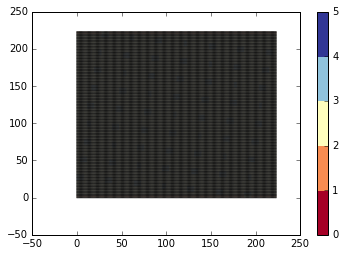

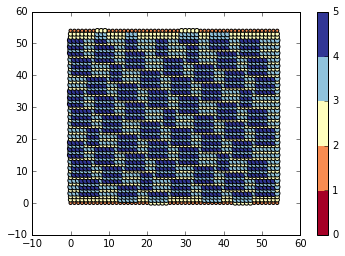

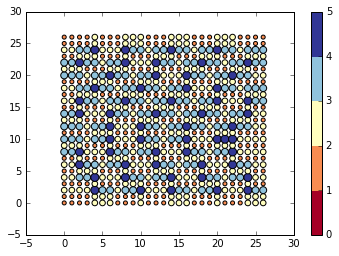

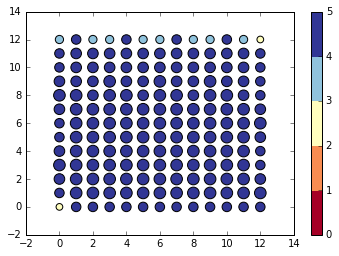

In [33]:
for layerID in range(0,network.numberOfLayers-1):
  network.Layers[layerID].displayTargetPECounts()


In [34]:
layerID = 0
numOfPEs = network.Layers[layerID].getTargetPECounts()



In [35]:
opt = np.get_printoptions()
np.set_printoptions(threshold=np.inf)
#print numOfPEs
#print numOfPEs.shape
np.set_printoptions(threshold=1000)


In [36]:
#coords = np.array([[0,0],[10,10]])
#network.Layers[1].displayTargetPECountsRegion(coords)

In [37]:
pLine = ''
for layerID in range(1,network.numberOfLayers):
  for peY in range(network.peY) :
    for peX in range(network.peX) :
      nv = network.peArray.pe[peY][peX].findROI(layerID)
      pLine = pLine + '{0:12},{1:12}  |  '.format(nv[0], nv[1])
      network.managerArray.manager[peY][peX].memCpyROI(layerID)
    pLine = pLine + '\n'
  pLine = pLine + '\n------------------------------------------------------------'
print pLine
print nv[0]
print nv[1]

  


[0 0 0]     ,[  2   7 195]  |  [  0   0 188],[  2  11 163]  |  [  0   4 156],[  2  15 131]  |  [  0   8 124],[ 2 19 99]    |  [ 0 12 96]  ,[ 2 23 71]    |  [ 0 16 64]  ,[ 2 27 39]    |  [ 0 20 32]  ,[ 2 31  7]    |  [ 0 24  0]  ,[  2  31 195]  |  
[  0  24 192],[  2  35 167]  |  [  0  28 160],[  2  39 135]  |  [  0  32 128],[  2  43 103]  |  [ 0 36 96]  ,[ 2 47 71]    |  [ 0 40 68]  ,[ 2 51 43]    |  [ 0 44 36]  ,[ 2 55 11]    |  [ 0 48  4]  ,[  2  55 199]  |  [  0  48 192],[  2  59 167]  |  
[  0  52 164],[  2  63 139]  |  [  0  56 132],[  2  67 107]  |  [  0  60 100],[ 2 71 75]    |  [ 0 64 68]  ,[ 2 75 43]    |  [ 0 68 40]  ,[ 2 79 15]    |  [ 0 72  8]  ,[  2  79 203]  |  [  0  72 196],[  2  83 171]  |  [  0  76 164],[  2  87 139]  |  
[  0  80 136],[  2  91 111]  |  [  0  84 104],[ 2 95 79]    |  [ 0 88 72]  ,[ 2 99 47]    |  [ 0 92 40]  ,[  2 103  15]  |  [ 0 96 12]  ,[  2 103 207]  |  [  0  96 200],[  2 107 175]  |  [  0 100 168],[  2 111 143]  |  [  0 104 136],[  2 115 111]  |  

In [39]:
layerID = 1
allocationOptions = dc.MemoryAllocationOptions(0,1,0,2,0,2,0,1,'Y')
network.managerArray.manager[0][0].allocateMemory(mainMemory, layerID, allocationOptions)
for y in range(network.managerArray.manager[0][0].roiCells[layerID][0].__len__()):
  for x in range(network.managerArray.manager[0][0].roiCells[layerID][0][0].__len__()):
    for z in range(network.managerArray.manager[0][0].roiCells[layerID].__len__()):
        pass
        #print network.managerArray.manager[0][0].roiCells[layerID][z][y][x]


In [40]:
pLine = ''
for layerID in range(0,network.numberOfLayers):
    for y in range(network.peY) :
        for x in range(network.peX) :
            #print network.managerArray.manager[y][x]
            #print network.managerArray.manager[y][x].pe
            pLine = pLine + '{0:5}'.format(str(network.managerArray.manager[y][x].pe.cellsProcessed[layerID].__len__()))
            #for c in network.managerArray.manager[y][x].pe.cellsProcessed[layerID] : 
            #    nv = c.findROI()
            #    print c
        pLine = pLine + '\n'
    pLine = pLine + '\n\n'
print pLine

2352 2352 2352 2352 2352 2352 2352 2352 
2352 2352 2352 2352 2352 2352 2352 2352 
2352 2352 2352 2352 2352 2352 2352 2352 
2352 2352 2352 2352 2352 2352 2352 2352 
2352 2352 2352 2352 2352 2352 2352 2352 
2352 2352 2352 2352 2352 2352 2352 2352 
2352 2352 2352 2352 2352 2352 2352 2352 
2352 2352 2352 2352 2352 2352 2352 2352 


189  189  189  189  189  189  189  189  
189  189  189  189  189  189  189  189  
189  189  189  189  189  189  189  189  
189  189  189  189  189  189  189  189  
189  189  189  189  189  189  189  189  
189  189  189  189  189  189  189  189  
189  189  189  189  189  189  189  189  
189  189  189  189  190  190  190  190  


91   91   91   91   91   91   91   91   
91   91   91   91   91   91   91   91   
91   91   91   91   91   91   91   91   
91   91   91   91   91   91   91   91   
91   91   91   91   91   91   91   91   
91   91   91   91   91   91   91   91   
91   91   91   91   91   91   91   91   
92   92   92   92   92   92   92   92   


10   10   